In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
corona_df = pd.read_csv('./corona.csv') 

In [3]:
corona_df.columns = ["인덱스","등록일시","사망자",
                    "확진자","게시글번호","기준일",
                    "기준시간","수정일시","누적의심자","누적확진률"]

In [4]:
corona_df_2 = corona_df.sort_values("등록일시")

In [5]:
corona_df_3 = corona_df_2.drop(["인덱스","게시글번호","기준일",
                                "기준시간","수정일시"],axis=1)

In [6]:
corona_df_3.reset_index(drop = True, inplace=True)

In [7]:
corona_df_3["등록일시"]=pd.to_datetime(corona_df_3["등록일시"],
                                        format="%Y-%m-%d")
# 0:월요일 /6:일요일
corona_df_3["요일"] = corona_df_3["등록일시"].dt.weekday

In [18]:
corona_df_3["일일 사망자"] = corona_df_3["사망자"].diff().fillna(0)

In [8]:
def chdt(x):
    if x == 0:
        return "Mon"
    elif x == 1:
        return "Tue"
    elif x == 2:
        return "Wed"
    elif x == 3:
        return "Thu"
    elif x == 4:
        return "Fri"
    elif x == 5:
        return "Sat"
    elif x == 6:
        return "Sun"
    else:
        return ""
corona_df_3["요일1"] = corona_df_3["요일"].apply(chdt)



corona_df_3

,등록일시,사망자,확진자,누적의심자,누적확진률,요일,요일1
0,2020-03-10 00:00:00.000,54,7513,210144.0,3.919308,1,Tue
1,2020-03-11 00:00:00.000,60,7755,222395.0,3.804175,2,Wed
2,2020-03-12 00:00:00.000,66,7869,234998.0,3.621744,3,Thu
3,2020-03-13 00:00:00.000,67,7979,248647.0,3.458499,4,Fri
4,2020-03-14 00:00:00.000,72,8086,261335.0,3.318000,5,Sat
...,...,...,...,...,...,...,...
715,2022-02-24 09:45:42.528,7689,2499187,NaN,NaN,3,Thu
716,2022-02-25 09:19:35.533,7783,2665074,NaN,NaN,4,Fri
717,2022-02-26 09:10:30.918,7895,2831275,NaN,NaN,5,Sat
718,2022-02-27 08:54:59.059,7944,2994830,NaN,NaN,6,Sun


In [9]:
def week(x):
    b = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"] 
    
    return b[x]
    

corona_df_3["요일2"] = corona_df_3["요일"].apply(week)
corona_df_3

,등록일시,사망자,확진자,누적의심자,누적확진률,요일,요일1,요일2
0,2020-03-10 00:00:00.000,54,7513,210144.0,3.919308,1,Tue,Tue
1,2020-03-11 00:00:00.000,60,7755,222395.0,3.804175,2,Wed,Wed
2,2020-03-12 00:00:00.000,66,7869,234998.0,3.621744,3,Thu,Thu
3,2020-03-13 00:00:00.000,67,7979,248647.0,3.458499,4,Fri,Fri
4,2020-03-14 00:00:00.000,72,8086,261335.0,3.318000,5,Sat,Sat
...,...,...,...,...,...,...,...,...
715,2022-02-24 09:45:42.528,7689,2499187,NaN,NaN,3,Thu,Thu
716,2022-02-25 09:19:35.533,7783,2665074,NaN,NaN,4,Fri,Fri
717,2022-02-26 09:10:30.918,7895,2831275,NaN,NaN,5,Sat,Sat
718,2022-02-27 08:54:59.059,7944,2994830,NaN,NaN,6,Sun,Sun


In [10]:
#def week(x):
    #x =[0,1,2,3,4,5,6]

    #return chdt(x)

In [11]:
d = ["M","T","W","T","F","S","S"]
corona_df_3["요일3"]=corona_df_3["요일"].apply(lambda x :d[x])
corona_df_3

,등록일시,사망자,확진자,누적의심자,누적확진률,요일,요일1,요일2,요일3
0,2020-03-10 00:00:00.000,54,7513,210144.0,3.919308,1,Tue,Tue,T
1,2020-03-11 00:00:00.000,60,7755,222395.0,3.804175,2,Wed,Wed,W
2,2020-03-12 00:00:00.000,66,7869,234998.0,3.621744,3,Thu,Thu,T
3,2020-03-13 00:00:00.000,67,7979,248647.0,3.458499,4,Fri,Fri,F
4,2020-03-14 00:00:00.000,72,8086,261335.0,3.318000,5,Sat,Sat,S
...,...,...,...,...,...,...,...,...,...
715,2022-02-24 09:45:42.528,7689,2499187,NaN,NaN,3,Thu,Thu,T
716,2022-02-25 09:19:35.533,7783,2665074,NaN,NaN,4,Fri,Fri,F
717,2022-02-26 09:10:30.918,7895,2831275,NaN,NaN,5,Sat,Sat,S
718,2022-02-27 08:54:59.059,7944,2994830,NaN,NaN,6,Sun,Sun,S


In [12]:
df_1= pd.DataFrame('a',index=[1],columns=['A'])
df_1

,A
1,a


In [13]:
values = [["1","2"],["2","30000000"],["3","0.10000"]]
columns = ["name","pay"]

df_2 = pd.DataFrame(values,columns = columns)
df_2

,name,pay
0,1,2
1,2,30000000
2,3,0.10000


In [21]:
death = corona_df_3["일일 사망자"]
np.array(death)

array([  0.,   6.,   6.,   1.,   5.,   3.,   0.,   6.,   3.,   7.,   3.,
         8.,   2.,   7.,   9.,   6.,   5.,   8.,   5.,   8.,   6.,   4.,
         3.,   4.,   5.,   3.,   6.,   3.,   6.,   8.,   4.,   4.,   3.,
         3.,   3.,   5.,   3.,   4.,   1.,   2.,   2.,   2.,   1.,   1.,
         2.,   0.,   0.,   2.,   1.,   1.,   2.,   1.,   1.,   2.,   0.,
         2.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   2.,   1.,   1.,
         2.,   0.,   1.,   0.,   0.,   1.,   0.,   2.,   0.,   1.,   2.,
         0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,
         0.,   0.,   1.,   2.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
         1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   2.,
         1.,   0.,   1.,   0.,   0.,   0.,   2.,   2.,   1.,   1.,   1.,
         0.,   1.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,
         0.,   0.,   0.,   0.,   1.,   0.,   1.,   

In [22]:
death.mean()

11.116666666666667

In [23]:
death.std()

18.19987161610865

In [15]:
import scipy.stats as stats

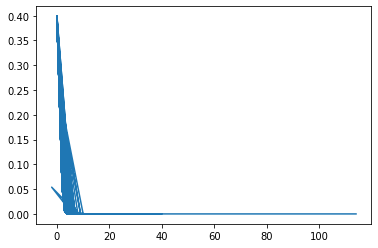

In [25]:
y = stats.norm(0,1).pdf(death)
plt.plot(death,y)
plt.show()